<a href="https://colab.research.google.com/github/Rido843/Basic-Python-Programming-for-Data-Science/blob/main/TUGAS_AKHIR_KELAS_DASAR_KELOMPOK_14_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

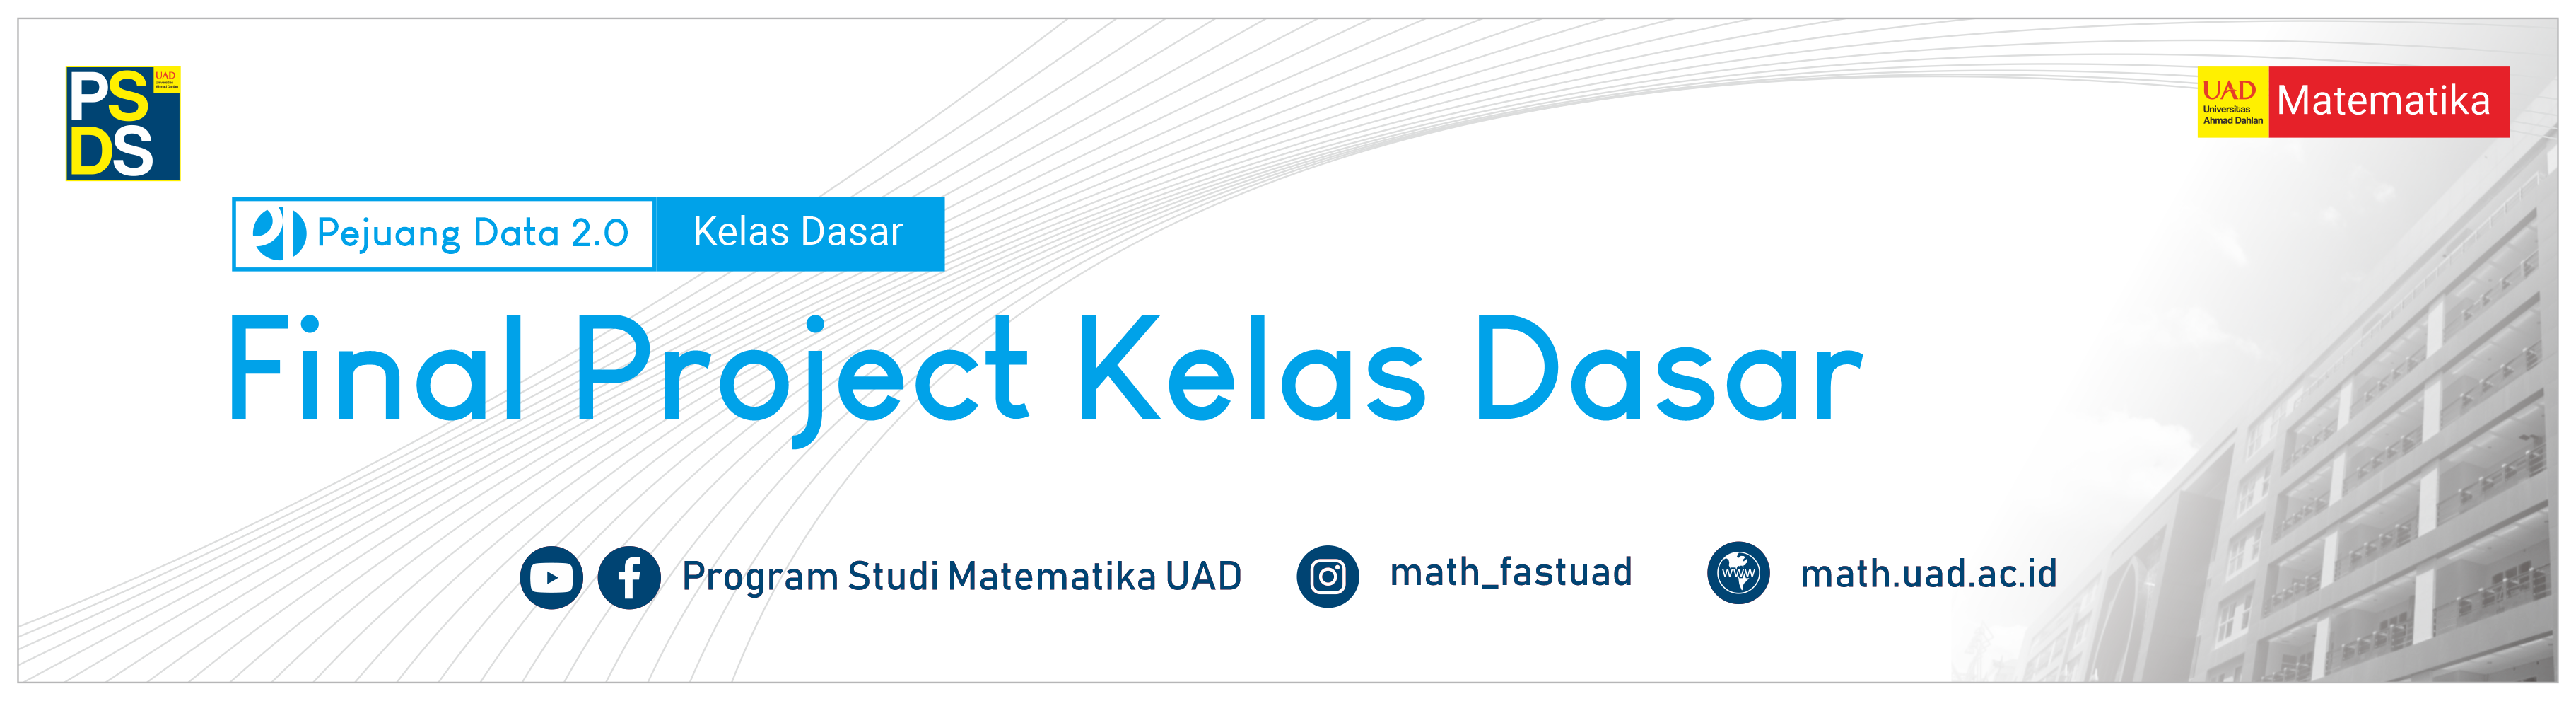

  # Tugas Akhir Kelas Dasar
  ## Identitas
  Kelompok : 14
  1. Rido Trimanto|1800015013
  2. Widya Agustina|1800015015
  3. Mirza Yuniar Renardi|180001506

# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/jumlahproduksibenih.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/produkolahanikan.csv')
data3 = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/pembudidayaikannasional.csv')
data4 = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/produksibudidayanasional.csv')
data5 = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/produksiperlakuanikannasional.csv')
data6 = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/angkakonsumsiikan.csv')

# Report

## Report 1: 
## Jenis benih ikan apa saja yang termasuk top 10 tertinggi untuk dibudidaya?

In [ ]:
data1

,ID,Benih,Budidaya,Tahun,Jumlah
0,1,bandeng <5 cm,budidaya tambak,2001,23646690
1,2,bandeng >5 cm,budidaya tambak,2001,5205005
2,3,udang windu,budidaya tambak,2001,19021171
3,4,udang putih,budidaya tambak,2001,2732715
4,5,udang vannamei,budidaya tambak,2001,0
...,...,...,...,...,...
446,447,semua ikan,budidaya tambak,2012,28966844
447,448,semua ikan,budidaya kolam,2012,10795957
448,449,semua ikan,budidaya karamba,2012,1182416
449,450,semua ikan,budidaya jaring apung,2012,2718598


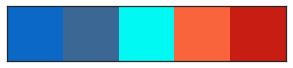

In [ ]:
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

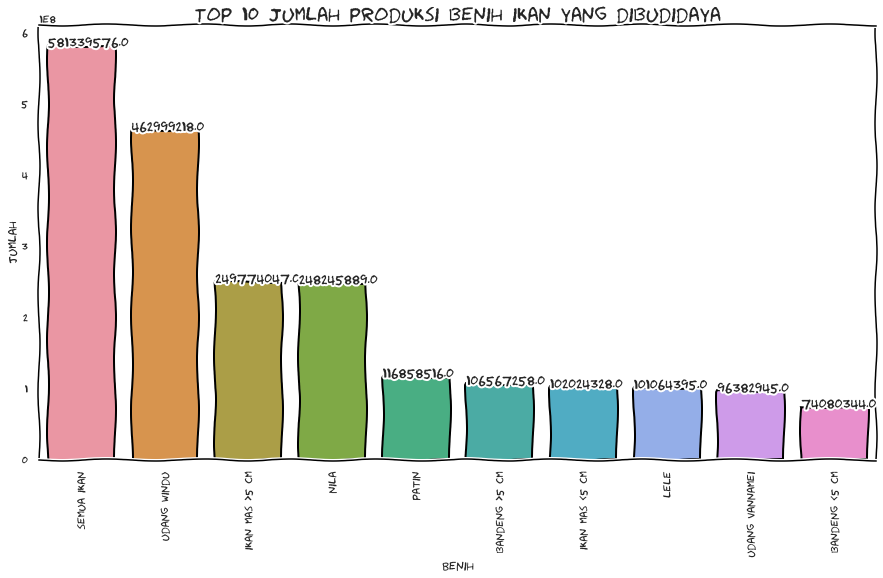

In [ ]:
top_10=data1.groupby(by='Benih').max()[['Jumlah','Tahun']].sort_values(by=['Jumlah'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 jumlah produksi benih ikan yang dibudidaya", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Jumlah',x='Benih', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

## Insight 1:
## Kenapa benih-benih tersebut yang tertinggi, Tahun kapan memiliki jumlah produksi benih terbanyak?

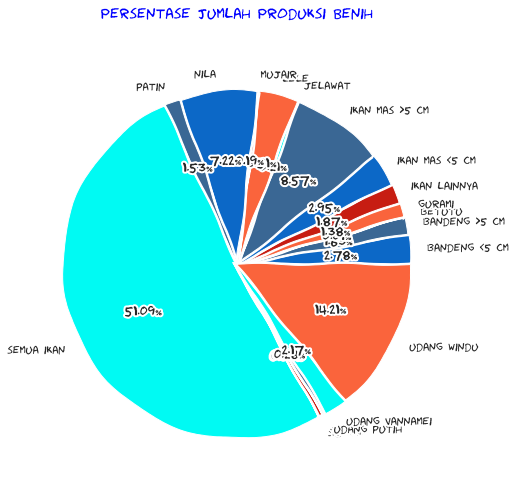

In [ ]:
bagan = data1.groupby('Benih')['Jumlah'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(8,8))
    plt.pie(bagan['Jumlah'], labels = bagan['Benih'], autopct='%1.2f%%')
    plt.title('Persentase Jumlah Produksi Benih', loc='center',pad=30, fontsize=15, color='blue')

### Dari persentase jumlah produksi benih di atas memang posisi paling banyak memproduksi benih dari semua jenis ikan dan posisi yang kedua itu produksi benih udang windu yang banyak dibudidaya tambak oleh masing-masing di setiap Provinsi di Indonesia


In [ ]:
#Melihat Tahun apa saja yang ada
data1.Tahun.value_counts()

2012    41
2011    41
2010    41
2009    41
2008    41
2007    41
2006    41
2005    41
2004    41
2003    41
2001    41
Name: Tahun, dtype: int64

In [ ]:
tahun1=data1.groupby('Tahun').Jumlah.sum()
print(tahun1)
Jumlah=max(tahun1)
b=tahun1.idxmax()

print("-------------------------------------------------------------------------------------------")
print("Tahun dengan jumlah produksi benih terbanyak adalah pada tahun",b , "dengan jumlah",Jumlah)


Tahun
2001     341569214
2003     357697260
2004    1180961672
2005    2055390808
2006    1164875066
2007    1364915759
2008      93339152
2009     799189740
2010     706925526
2011      94461925
2012      90710690
Name: Jumlah, dtype: int64
-------------------------------------------------------------------------------------------
Tahun dengan jumlah produksi benih terbanyak adalah pada tahun 2005 dengan jumlah 2055390808


### Dapat dilihat bahwa jumlah terbanyak produksi benih ikan terjadi pada tahun 2005 untuk seluruh wilayah di Indonesia

## Report 2:
## Wilayah mana sajakah yang memiliki produk olahan ikan terbanyak?

In [ ]:
data2

,ID,ProvinsiID,NamaProvinsi,Wilayah,JenisOlahan,JenisPerairan,Tahun,Volume,OlahanID
0,1,11,Aceh,Sumatera,semua,Laut,2001,8640,0
1,2,12,Sumatera Utara,Sumatera,semua,Laut,2001,151576,0
2,3,13,Sumatera Barat,Sumatera,semua,Laut,2001,17831,0
3,4,14,Riau,Sumatera,semua,Laut,2001,52833,0
4,5,21,Kepulauan Riau,Sumatera,semua,Laut,2001,0,0
...,...,...,...,...,...,...,...,...,...
6331,5804,74,Sulawesi Tenggara,Sulawesi,ikan olahan lainnya,Umum,2011,0,8
6332,5805,81,Maluku,Maluku - Papua,ikan olahan lainnya,Umum,2011,0,8
6333,5806,82,Maluku Utara,Maluku - Papua,ikan olahan lainnya,Umum,2011,0,8
6334,5807,91,Papua Barat,Maluku - Papua,ikan olahan lainnya,Umum,2011,9,8


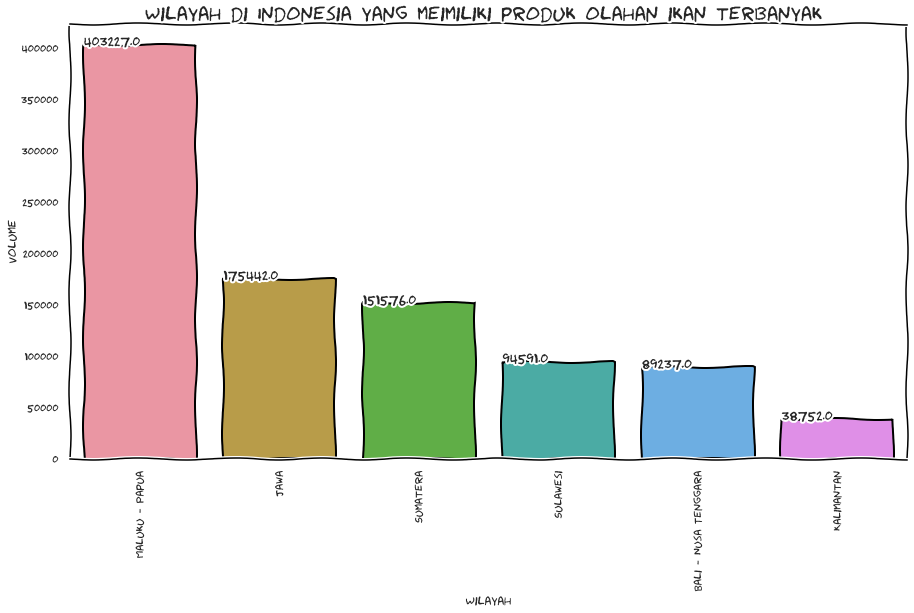

In [ ]:
top_wilayah=data2.groupby(by='Wilayah').max()[['Volume','Tahun']].sort_values(by=['Volume'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Wilayah di Indonesia yang meimiliki produk olahan ikan terbanyak ", size=20)
    ax=sns.barplot(data=top_wilayah.iloc[:10],y='Volume',x='Wilayah', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

## Insight 2:
## Mengapa ke-enam wilayah tersebut memiliki jumlah produksi olahan tertinggi? Apa jenis olahan yang diproduksi paling rendah?

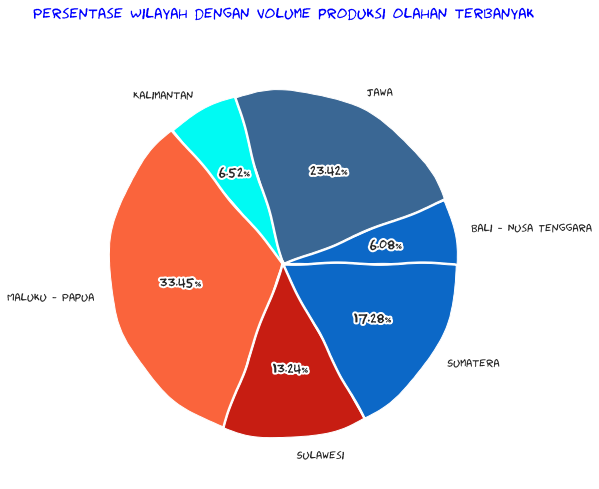

In [ ]:
bagan2 = data2.groupby('Wilayah')['Volume'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(8,8))
    plt.pie(bagan2['Volume'], labels = bagan2['Wilayah'], autopct='%1.2f%%')
    plt.title('Persentase Wilayah dengan volume produksi olahan terbanyak', loc='center',pad=30, fontsize=15, color='blue')

In [ ]:
#Melihat Jenis Olahan apa saja yang ada
data2.JenisOlahan.value_counts()

ikan beku              792
ikan olahan lainnya    792
ikan pindang           792
ikan peragian          792
ikan asap              792
ikan kering/asin       792
semua                  792
ikan kalengan          396
tepung ikan            396
Name: JenisOlahan, dtype: int64

In [ ]:
olahan=data2.groupby('JenisOlahan').Volume.sum()
print(olahan)
Volume=min(olahan)
b=olahan.idxmin()

print("---------------------------------------------------------------------------------------------------")
print("Jenis olahan ikan dengan volume produk olahan yang paling rendah adalah",b , "dengan volume",Volume)

JenisOlahan
ikan asap                907530
ikan beku               6417528
ikan kalengan            382104
ikan kering/asin        5915315
ikan olahan lainnya      385192
ikan peragian            252087
ikan pindang            1400541
semua                  15777469
tepung ikan              117146
Name: Volume, dtype: int64
---------------------------------------------------------------------------------------------------
Jenis olahan ikan dengan volume produk olahan yang paling rendah adalah tepung ikan dengan volume 117146


### Dapat dilihat bahwa jenis olahan ikan yang diproduksi paling rendah adalah jenis olahan tepung ikan untuk seluruh wilayah di Indonesia

## Report 3:
## Provinsi manakah yang memiliki jumlah hasil budidaya tertinggi di pulau Kalimantan dan Sulawesi? Provinsi manakah yang mendominasi ke-3 dalam pembudidayaan ikan di pulau kalimantan?

In [ ]:
data3

,ID,ProvinsiID,NamaProvinsi,BudidayaID,Budidaya,Tahun,Jumlah
0,1,11,Aceh,0,semua budidaya,2002,30959
1,2,12,Sumatera Utara,0,semua budidaya,2002,49553
2,3,13,Sumatera Barat,0,semua budidaya,2002,103354
3,4,14,Riau,0,semua budidaya,2002,39488
4,5,15,Jambi,0,semua budidaya,2002,25171
...,...,...,...,...,...,...,...
358,359,76,Sulawesi Barat,0,semua budidaya,2012,68469
359,360,81,Maluku,0,semua budidaya,2012,54870
360,361,82,Maluku Utara,0,semua budidaya,2012,6020
361,362,91,Papua Barat,0,semua budidaya,2012,14547


In [ ]:
#membentuk data frame baru untuk "NamaProvinsi" (Pulau Kalimantan dan Sulawesi)
df_KalBar = data3[data3['NamaProvinsi'] == 'Kalimantan Barat']
df_KalTeng = data3[data3['NamaProvinsi'] == 'Kalimantan Tengah']
df_KalSel = data3[data3['NamaProvinsi'] == 'Kalimantan Selatan']
df_KalTim = data3[data3['NamaProvinsi'] == 'Kalimantan Timur']
df_SulTeng = data3[data3['NamaProvinsi'] == 'Sulawesi Tengah']
df_SulSel = data3[data3['NamaProvinsi'] == 'Sulawesi Selatan']
df_SulBar = data3[data3['NamaProvinsi'] == 'Sulawesi Barat']
df_SulTra = data3[data3['NamaProvinsi'] == 'Sulawesi Tenggara']

In [ ]:
sum_KalBar = df_KalBar.Jumlah.sum()
sum_KalTeng = df_KalTeng.Jumlah.sum()
sum_KalSel = df_KalSel.Jumlah.sum()
sum_KalTim = df_KalTim.Jumlah.sum()
sum_SulTeng = df_SulTeng.Jumlah.sum()
sum_SulSel = df_SulSel.Jumlah.sum()
sum_SulBar = df_SulBar.Jumlah.sum()
sum_SulTra = df_SulTra.Jumlah.sum()

In [ ]:
df_Jumlah = pd.DataFrame({"NamaProvinsi":['Kalimantan Barat','Kalimantan Tengah','Kalimantan Selatan','Kalimantan Timur','Sulawesi Tengah','Sulawesi Selatan','Sulawesi Barat','Sulawesi Tenggara'],
                          "Jumlah":[sum_KalBar, sum_KalTeng, sum_KalSel, sum_KalTim, sum_SulTeng, sum_SulSel, sum_SulBar, sum_SulTra]})
df_Jumlah.sort_values(['Jumlah','NamaProvinsi'], ascending=[True, False], inplace=False)
df_Jumlah

,NamaProvinsi,Jumlah
0,Kalimantan Barat,393312
1,Kalimantan Tengah,291593
2,Kalimantan Selatan,208763
3,Kalimantan Timur,595749
4,Sulawesi Tengah,469223
5,Sulawesi Selatan,1991605
6,Sulawesi Barat,494786
7,Sulawesi Tenggara,593110


Text(0, 593110.0, 'Provinsi yang mendominasi tertinggi ke-3')

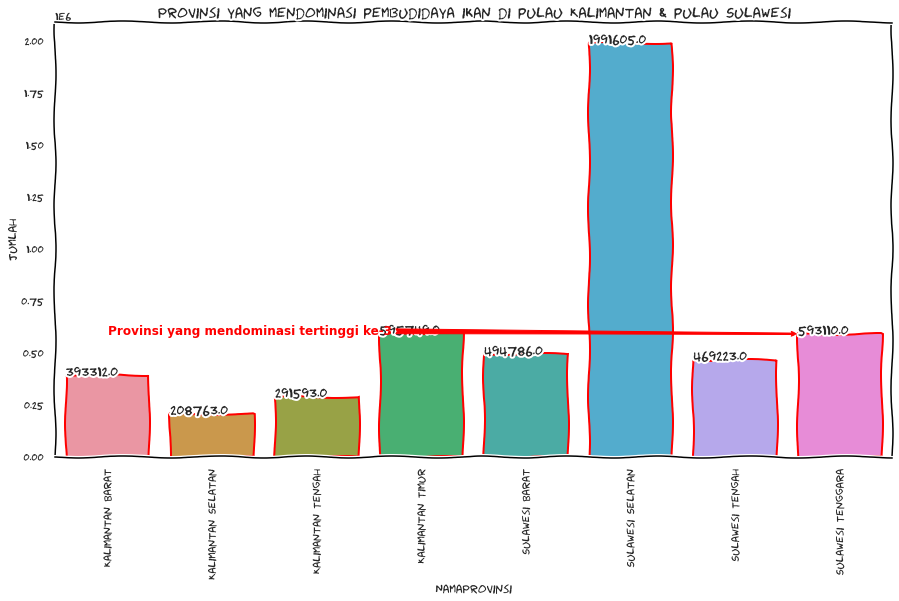

In [ ]:
dominasi=df_Jumlah.groupby('NamaProvinsi')['Jumlah'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title(" Provinsi yang mendominasi pembudidaya ikan di pulau Kalimantan & pulau Sulawesi ", size=15)
    ax=sns.barplot(data=dominasi.iloc[:10],y='Jumlah',x='NamaProvinsi', linewidth=2, edgecolor='red')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
       
plt.annotate('Provinsi yang mendominasi tertinggi ke-3', xy=(i.get_x(),i.get_height()), 
            xytext=(0,i.get_height()), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
             connectionstyle="arc3",
             color='red'))


### Jadi Provinsi yang paling mendominasi tertimggi ke-3 yaitu Provinsi Sulawesi Tenggara

## Insight 3:
## Berapakah Persentase dari masing-masing setiap Provinsi? Provinsi mana yang paling tinggi?

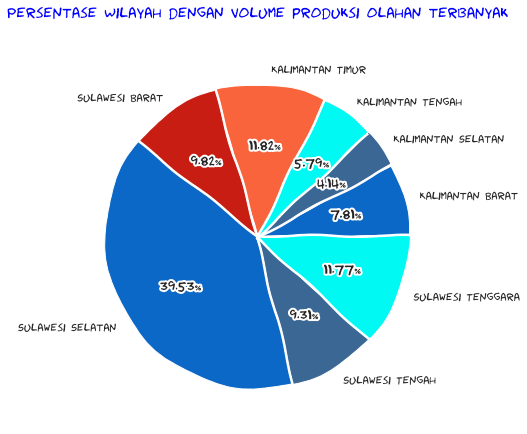

In [ ]:
dominasi2=df_Jumlah.groupby('NamaProvinsi')['Jumlah'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(7,7))
    plt.pie(dominasi2['Jumlah'], labels = dominasi2['NamaProvinsi'], autopct='%1.2f%%')
    plt.title('Persentase Wilayah dengan volume produksi olahan terbanyak', loc='center',pad=30, fontsize=15, color='blue')

### Dari persentase dari masing-masing Provinsi di atas yang termasuk 3 Provinsi tertinggi hasil budayanya yaitu:
1. Provinsi Sulawesi Selatan
2. Kalimantan Timur
3. Sulawesi Tenggara


In [ ]:
dominasi3=df_Jumlah.groupby('NamaProvinsi').Jumlah.sum()
print(dominasi3)
Jumlah=max(dominasi3)
b=dominasi3.idxmax()

print("---------------------------------------------------------------------------------------------------")
print("Provinsi dengan hasil budidaya ikan yang paling tinggi adalah",b , "dengan jumlah",Jumlah)

NamaProvinsi
Kalimantan Barat       393312
Kalimantan Selatan     208763
Kalimantan Tengah      291593
Kalimantan Timur       595749
Sulawesi Barat         494786
Sulawesi Selatan      1991605
Sulawesi Tengah        469223
Sulawesi Tenggara      593110
Name: Jumlah, dtype: int64
---------------------------------------------------------------------------------------------------
Provinsi dengan hasil budidaya ikan yang paling tinggi adalah Sulawesi Selatan dengan jumlah 1991605


### Provinsi dengan hasil budidaya ikan yang paling tinggi adalah Sulawesi Selatan dengan jumlah 1991605

## Report 4:
## Jenis Ikan apa yang memiliki Volume Produksi tertinggi?

In [ ]:
data4

,ID,ProvinsiID,NamaProvinsi,Budidaya,NamaIkan,Tahun,Volume,Nilai,IkanID
0,1,11,Aceh,semua budidaya,total,2003,33877,6.303674e+08,0
1,2,12,Sumatera Utara,semua budidaya,total,2003,44187,1.111789e+09,0
2,3,13,Sumatera Barat,semua budidaya,total,2003,30690,2.545988e+08,0
3,4,14,Riau,semua budidaya,total,2003,36393,1.151402e+09,0
4,5,15,Jambi,semua budidaya,total,2003,9358,1.153666e+08,0
...,...,...,...,...,...,...,...,...,...
4615,4649,76,Sulawesi Barat,semua budidaya,lainnya,2012,85,8.457500e+05,31
4616,4650,81,Maluku,semua budidaya,lainnya,2012,566,3.796878e+08,31
4617,4651,82,Maluku Utara,semua budidaya,lainnya,2012,83,1.245000e+06,31
4618,4652,91,Papua Barat,semua budidaya,lainnya,2012,271,6.700200e+07,31


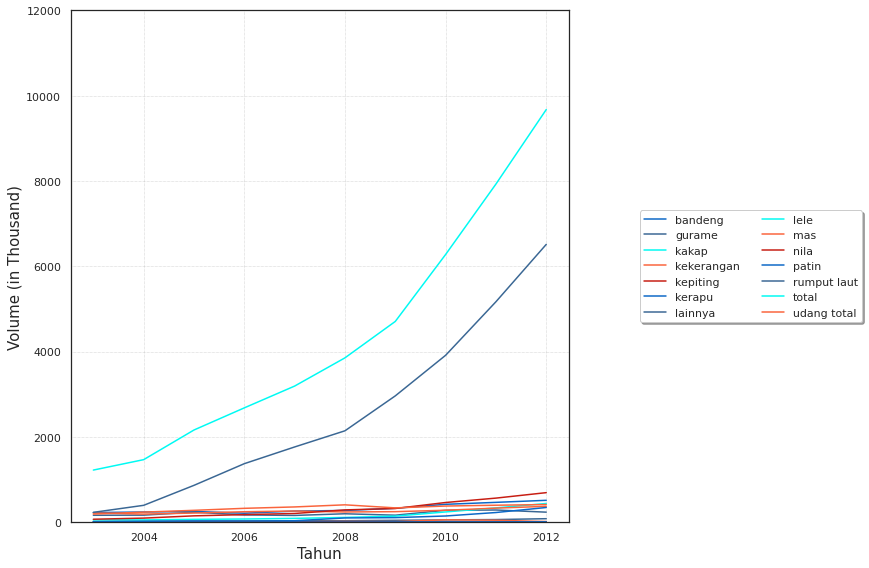

In [ ]:
import matplotlib.pyplot as plt
data4.groupby(['Tahun','NamaIkan'])['Volume'].sum().unstack().plot()
plt.title('',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Tahun', fontsize = 15)
plt.ylabel('Volume (in Thousand)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
#Menambah Legend
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(15, 8)
plt.tight_layout()
plt.show()

## Insight 4:
## Berapa persentase volume dari masing-masing jenis ikan?

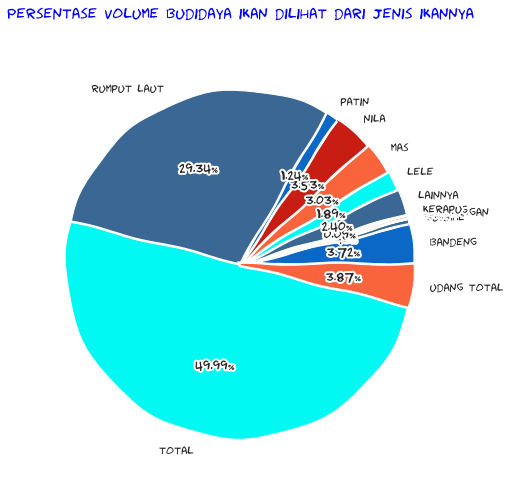

In [ ]:
bagan4 = data4.groupby('NamaIkan')['Volume'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(8,8))
    plt.pie(bagan4['Volume'], labels = bagan4['NamaIkan'], autopct='%1.2f%%')
    plt.title('Persentase Volume budidaya ikan dilihat dari jenis ikannya', loc='center',pad=30, fontsize=15, color='blue')

### Dari grafik di atas maka jenis ikan yang paling banyak dibudidaya adalah rumput laut yaitu 29,34% sementara total semua jenis ikan yaitu 49,9%

## Report 5:
## Provinsi mana yang paling mendominasi dalam perlakuan pembudidaya ikan di pulau Kalimantan?

In [ ]:
data5

,ID,ProvinsiID,NamaProvinsi,Wilayah,JenisPerlakuan,JenisPerairan,Tahun,Volume
0,1,11,Aceh,Sumatera,semua,Laut,2001,102824
1,2,12,Sumatera Utara,Sumatera,semua,Laut,2001,341325
2,3,13,Sumatera Barat,Sumatera,semua,Laut,2001,100880
3,4,14,Riau,Sumatera,semua,Laut,2001,301519
4,5,21,Kepulauan Riau,Sumatera,semua,Laut,2001,0
...,...,...,...,...,...,...,...,...
7123,6530,74,Sulawesi Tenggara,Sulawesi,pengawetan lainnya,Umum,2011,0
7124,6531,81,Maluku,Maluku - Papua,pengawetan lainnya,Umum,2011,0
7125,6532,82,Maluku Utara,Maluku - Papua,pengawetan lainnya,Umum,2011,0
7126,6533,91,Papua Barat,Maluku - Papua,pengawetan lainnya,Umum,2011,12


In [ ]:
df_KalBar = data5[data5['NamaProvinsi'] == 'Kalimantan Barat']
df_KalTeng = data5[data5['NamaProvinsi'] == 'Kalimantan Tengah']
df_KalSel = data5[data5['NamaProvinsi'] == 'Kalimantan Selatan']
df_KalTim = data5[data5['NamaProvinsi'] == 'Kalimantan Timur']

In [ ]:
sum_KalBar = df_KalBar.Volume.sum()
sum_KalTeng = df_KalTeng.Volume.sum()
sum_KalSel = df_KalSel.Volume.sum()
sum_KalTim = df_KalTim.Volume.sum()

In [ ]:
df_Volume = pd.DataFrame({"NamaProvinsi":['Kalimantan Barat','Kalimantan Tengah','Kalimantan Selatan','Kalimantan Timur'],
                          "Volume":[sum_KalBar, sum_KalTeng, sum_KalSel, sum_KalTim],"Tahun":['2008','2009','2010','2011']})
df_Volume.sort_values(['Volume','NamaProvinsi'], ascending=[True, False], inplace=False)
df_Volume

,NamaProvinsi,Volume,Tahun
0,Kalimantan Barat,393312,2008
1,Kalimantan Tengah,291593,2009
2,Kalimantan Selatan,208763,2010
3,Kalimantan Timur,595749,2011


Text(0, 595749.0, 'Provinsi dengan volume perlakuan ikan yang tertinggi')

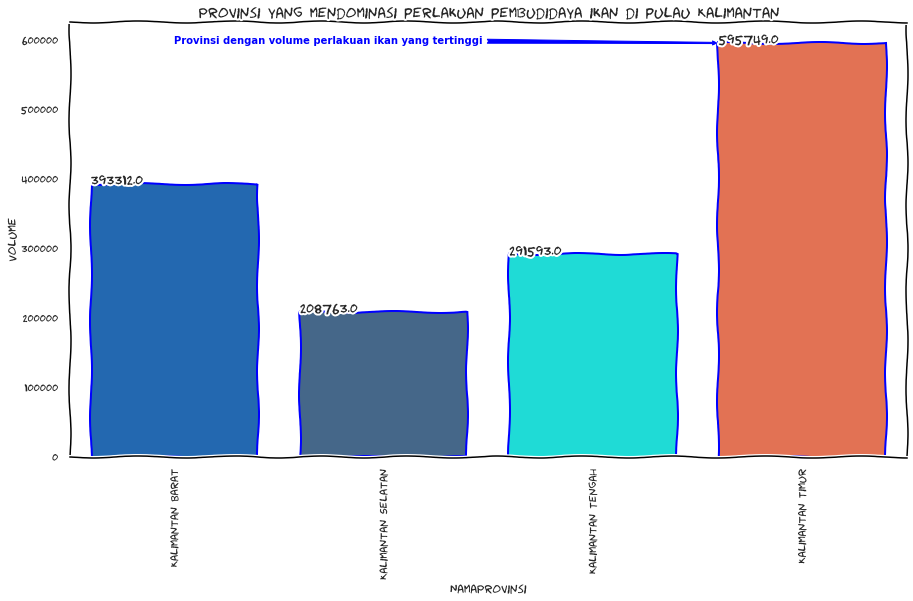

In [ ]:
dominasi2=df_Volume.groupby('NamaProvinsi')['Volume'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title(" Provinsi yang mendominasi perlakuan pembudidaya ikan di pulau Kalimantan ", size=15)
    ax=sns.barplot(data=dominasi2.iloc[:10],y='Volume',x='NamaProvinsi', linewidth=2, edgecolor='blue')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
       
plt.annotate('Provinsi dengan volume perlakuan ikan yang tertinggi', xy=(i.get_x(),i.get_height()), 
            xytext=(0,i.get_height()), weight='bold', color='blue',
             arrowprops=dict(arrowstyle='fancy',
             connectionstyle="arc3",
             color='blue'))

## Insight 5:
## Pada akhir tahun berapa Kaliman Timur sangat mendominasi terhadap perlakuan pembudidaya ikan di pulau Kalimantan?

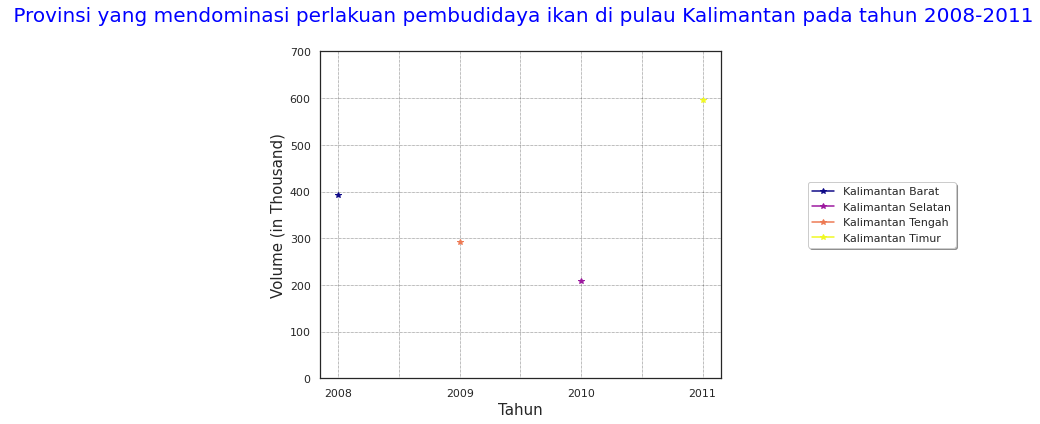

In [ ]:
import matplotlib.pyplot as plt
df_Volume.groupby(['Tahun','NamaProvinsi'])['Volume'].sum().unstack().plot(marker='*', cmap='plasma')
plt.title(" Provinsi yang mendominasi perlakuan pembudidaya ikan di pulau Kalimantan pada tahun 2008-2011",loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Tahun', fontsize = 15)
plt.ylabel('Volume (in Thousand)',fontsize = 15)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
#Menambah Legend
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=1)
plt.gcf().set_size_inches(14, 6)
plt.tight_layout()
plt.show()

### Pada Grafik di atas volume Provinsi Kalimantan Timur  mendominasi perlakuan pembudidaya ikan pada akhir tahun 2011

## Report 6:
## Bagaimana hubungan produksi budidaya ikan vs Jumlah pembudidaya nasional?

### Menggabungkan data 

In [ ]:
frames=[data3, data4]
data24 = pd.concat(frames).drop_duplicates().reset_index(drop=True)
data24

,ID,ProvinsiID,NamaProvinsi,BudidayaID,Budidaya,Tahun,Jumlah,NamaIkan,Volume,Nilai,IkanID
0,1,11,Aceh,0.0,semua budidaya,2002,30959.0,NaN,NaN,NaN,NaN
1,2,12,Sumatera Utara,0.0,semua budidaya,2002,49553.0,NaN,NaN,NaN,NaN
2,3,13,Sumatera Barat,0.0,semua budidaya,2002,103354.0,NaN,NaN,NaN,NaN
3,4,14,Riau,0.0,semua budidaya,2002,39488.0,NaN,NaN,NaN,NaN
4,5,15,Jambi,0.0,semua budidaya,2002,25171.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4978,4649,76,Sulawesi Barat,NaN,semua budidaya,2012,NaN,lainnya,85.0,845750.0,31.0
4979,4650,81,Maluku,NaN,semua budidaya,2012,NaN,lainnya,566.0,379687750.0,31.0
4980,4651,82,Maluku Utara,NaN,semua budidaya,2012,NaN,lainnya,83.0,1245000.0,31.0
4981,4652,91,Papua Barat,NaN,semua budidaya,2012,NaN,lainnya,271.0,67002000.0,31.0


### Mengecek dimensi data

In [ ]:
data24.shape

(4983, 11)

### Mengecek Variabel data

In [ ]:
data24.columns.values

array(['ID', 'ProvinsiID', 'NamaProvinsi', 'BudidayaID', 'Budidaya',
       'Tahun', 'Jumlah', 'NamaIkan', 'Volume', 'Nilai', 'IkanID'],
      dtype=object)

### Melihat Tipe data dan Variabel

In [ ]:
data24.columns.values

array(['ID', 'ProvinsiID', 'NamaProvinsi', 'BudidayaID', 'Budidaya',
       'Tahun', 'Jumlah', 'NamaIkan', 'Volume', 'Nilai', 'IkanID'],
      dtype=object)

In [ ]:
data24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4983 non-null   int64  
 1   ProvinsiID    4983 non-null   int64  
 2   NamaProvinsi  4983 non-null   object 
 3   BudidayaID    363 non-null    float64
 4   Budidaya      4983 non-null   object 
 5   Tahun         4983 non-null   int64  
 6   Jumlah        363 non-null    float64
 7   NamaIkan      4620 non-null   object 
 8   Volume        4620 non-null   float64
 9   Nilai         4620 non-null   float64
 10  IkanID        4620 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 428.4+ KB


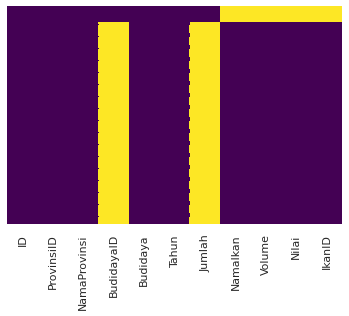

In [ ]:
sns.heatmap(data24.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Missing data

In [ ]:
data24.isnull().sum()

ID                 0
ProvinsiID         0
NamaProvinsi       0
BudidayaID      4620
Budidaya           0
Tahun              0
Jumlah          4620
NamaIkan         363
Volume           363
Nilai            363
IkanID           363
dtype: int64

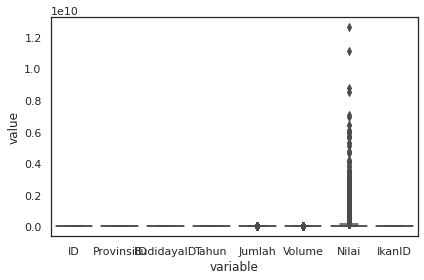

In [ ]:
df1=data24.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='yellow',orient='v', data=pd.melt(df1))
plt.tight_layout()

### Menghapus data yang tidak terpakai

In [ ]:
data24.drop('ID',inplace=True,axis=1)
data24.drop('ProvinsiID',inplace=True,axis=1)
data24.drop('IkanID',inplace=True,axis=1)
data24.drop('Budidaya',inplace=True,axis=1)
data24.drop('BudidayaID',inplace=True,axis=1)
data24.drop('Tahun',inplace=True,axis=1)
data24.head()

,NamaProvinsi,Jumlah,NamaIkan,Volume,Nilai
0,Aceh,30959.0,NaN,NaN,NaN
1,Sumatera Utara,49553.0,NaN,NaN,NaN
2,Sumatera Barat,103354.0,NaN,NaN,NaN
3,Riau,39488.0,NaN,NaN,NaN
4,Jambi,25171.0,NaN,NaN,NaN


### Mengisi NaN

In [ ]:
#df.fillna(df.mean(),axis='columns')
data24=data24.fillna(method='bfill')
data24=data24.fillna(method='ffill')
data24

,NamaProvinsi,Jumlah,NamaIkan,Volume,Nilai
0,Aceh,30959.0,total,33877.0,630367421.0
1,Sumatera Utara,49553.0,total,33877.0,630367421.0
2,Sumatera Barat,103354.0,total,33877.0,630367421.0
3,Riau,39488.0,total,33877.0,630367421.0
4,Jambi,25171.0,total,33877.0,630367421.0
...,...,...,...,...,...
4978,Sulawesi Barat,15678.0,lainnya,85.0,845750.0
4979,Maluku,15678.0,lainnya,566.0,379687750.0
4980,Maluku Utara,15678.0,lainnya,83.0,1245000.0
4981,Papua Barat,15678.0,lainnya,271.0,67002000.0


In [ ]:
data24.isnull().sum()

NamaProvinsi    0
Jumlah          0
NamaIkan        0
Volume          0
Nilai           0
dtype: int64

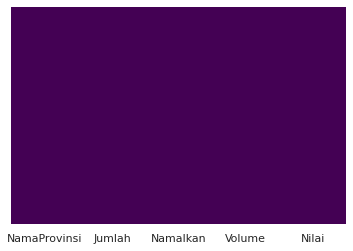

In [ ]:
sns.heatmap(data24.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

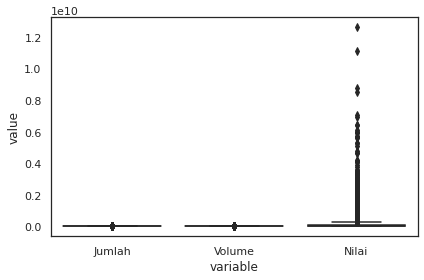

In [ ]:
df1=data24.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

### Melakukan Pengkodean data string

In [ ]:
data24['NamaProvinsi'].value_counts()

Bali                         151
Sumatera Barat               151
Kepulauan Bangka Belitung    151
Sulawesi Tengah              151
Nusa Tenggara Barat          151
Lampung                      151
Jawa Barat                   151
Sumatera Utara               151
Sumatera Selatan             151
Maluku                       151
Banten                       151
Maluku Utara                 151
Kalimantan Barat             151
Aceh                         151
Jawa Tengah                  151
Sulawesi Tenggara            151
Jawa Timur                   151
Kalimantan Timur             151
Papua Barat                  151
Jambi                        151
Papua                        151
Sulawesi Selatan             151
Kalimantan Selatan           151
Gorontalo                    151
DKI Jakarta                  151
Nusa Tenggara Timur          151
Sulawesi Barat               151
Bengkulu                     151
DI Yogyakarta                151
Sulawesi Utara               151
Riau      

In [ ]:
data24["NamaProvinsi"] = data24["NamaProvinsi"].astype('category')

In [ ]:
data24['Jumlah'].value_counts()

15678.0     4621
0.0           10
24602.0        2
498352.0       2
34202.0        1
            ... 
72374.0        1
41308.0        1
94181.0        1
30640.0        1
61.0           1
Name: Jumlah, Length: 352, dtype: int64

In [ ]:
data24["Jumlah"] = data24["Jumlah"].astype('category')

In [ ]:
data24['Volume'].value_counts()

0.0        1150
33877.0     364
1.0          74
2.0          50
3.0          38
           ... 
572.0         1
31905.0       1
2201.0        1
284.0         1
776.0         1
Name: Volume, Length: 2295, dtype: int64

In [ ]:
data24["Volume"] = data24["Volume"].astype('category')

In [ ]:
data24['NamaIkan'].value_counts()

total          693
udang total    330
mas            330
lainnya        330
patin          330
gurame         330
kakap          330
kerapu         330
nila           330
kepiting       330
kekerangan     330
rumput laut    330
bandeng        330
lele           330
Name: NamaIkan, dtype: int64

In [ ]:
data24["NamaIkan"] = data24["NamaIkan"].astype('category')

In [ ]:
data24['Nilai'].value_counts()

0.0            1137
630367421.0     364
40000.0           4
15000.0           3
20000.0           3
               ... 
508713200.0       1
30060000.0        1
5614400.0         1
406668552.0       1
2998640.0         1
Name: Nilai, Length: 3427, dtype: int64

In [ ]:
data24["Nilai"] = data24["Nilai"].astype('category')

### Proses penkodean

In [ ]:
#Proses Pengkodean
data24["Volume"] = data24["Volume"].cat.codes
data24["NamaProvinsi"] = data24["NamaProvinsi"].cat.codes
data24["Jumlah"] = data24["Jumlah"].cat.codes
data24["NamaIkan"] = data24["NamaIkan"].cat.codes
data24["Nilai"] = data24["Nilai"].cat.codes
data24.head()

,NamaProvinsi,Jumlah,NamaIkan,Volume,Nilai
0,0,168,12,1889,3096
1,32,218,12,1889,3096
2,30,289,12,1889,3096
3,24,194,12,1889,3096
4,7,141,12,1889,3096


In [ ]:
#Menghitung Skor IQR
sorted(data24)

Q1=data24.quantile(0.25)
Q3=data24.quantile(0.75)
IQR=Q3-Q1
print(IQR)

NamaProvinsi      16.0
Jumlah             0.0
NamaIkan           8.0
Volume          1414.5
Nilai           2447.0
dtype: float64


In [ ]:
#Menghapus Outlier
data24_clear = data24[~((data24 < (Q1 - 1.5 * IQR)) |(data24 > (Q3 + 1.5 * IQR))).any(axis=1)]
data24_clear

,NamaProvinsi,Jumlah,NamaIkan,Volume,Nilai
362,22,90,12,1889,3096
363,0,90,12,1889,3096
364,32,90,12,1965,3239
365,30,90,12,1868,2866
366,24,90,12,1912,3246
...,...,...,...,...,...
4978,25,90,6,88,604
4979,18,90,6,429,2978
4980,19,90,6,86,715
4981,23,90,6,241,2383


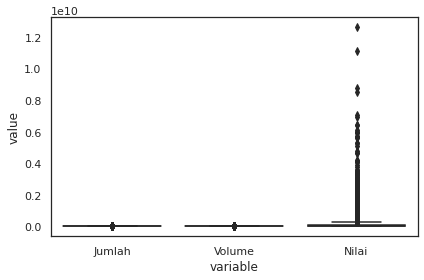

In [ ]:
#Setelah memperkecil outlier
df2=data24_clear.select_dtypes(include=['float64', 'int64','category'])

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

 ### Normalisasi data

In [ ]:
data24_clear.dtypes

NamaProvinsi     int8
Jumlah          int16
NamaIkan         int8
Volume          int16
Nilai           int16
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
data24_norm = pd.DataFrame(scaler.fit_transform(data24_clear), columns=data24_clear.columns)

data24_norm

,NamaProvinsi,Jumlah,NamaIkan,Volume,Nilai
0,0.68750,0.0,0.923077,0.823452,0.903678
1,0.00000,0.0,0.923077,0.823452,0.903678
2,1.00000,0.0,0.923077,0.856582,0.945417
3,0.93750,0.0,0.923077,0.814298,0.836544
4,0.75000,0.0,0.923077,0.833479,0.947461
...,...,...,...,...,...
4616,0.78125,0.0,0.461538,0.038361,0.176299
4617,0.56250,0.0,0.461538,0.187010,0.869235
4618,0.59375,0.0,0.461538,0.037489,0.208698
4619,0.71875,0.0,0.461538,0.105057,0.695563


<Figure size 432x288 with 0 Axes>

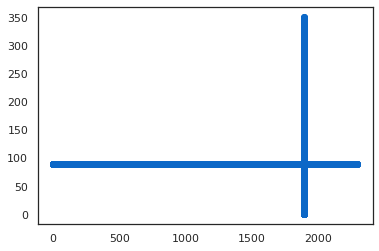

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data24['Volume'], data24['Jumlah'])
plt.show()

## Insight 6:
## Korelasi antara Jumlah pembudidaya nasional dengan Volume produksi budidaya nasional? Apa akibatnya?

In [ ]:
korelasi2=data24.corr()
print(korelasi)

              NamaProvinsi  JenisOlahan     Tahun  ...  Budidaya  NamaIkan     Nilai
NamaProvinsi      1.000000     0.594555 -0.114778  ...       NaN  0.545225  0.586312
JenisOlahan       0.594555     1.000000 -0.119012  ...       NaN  0.565339  0.607942
Tahun            -0.114778    -0.119012  1.000000  ...       NaN -0.109138 -0.038770
Volume           -0.088461    -0.098057  0.087178  ...       NaN  0.072206  0.269124
Budidaya               NaN          NaN       NaN  ...       NaN       NaN       NaN
NamaIkan          0.545225     0.565339 -0.109138  ...       NaN  1.000000  0.721367
Nilai             0.586312     0.607942 -0.038770  ...       NaN  0.721367  1.000000

[7 rows x 7 columns]


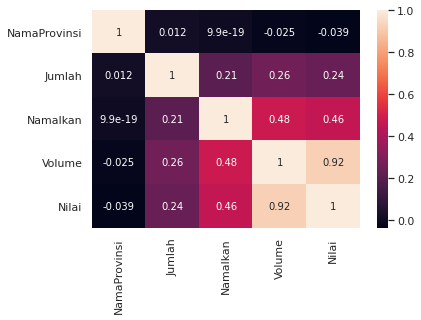

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(korelasi2, annot=True)
plt.show()

### Disimpulkan bahwa korelasi antara Jumlah pembudidaya nasional dengan Volume produksi budidaya nasional yaitu berkorelasi positif yaitu berjalan dengan arah yang sama. Misal jika Jumlah pembudidaya nasional bertambah maka volume budidaya akan bertambah juga dan sebaliknya.